In [39]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from matplotlib.pyplot import cm
from astropy import constants as const
from astropy import units as u
import numpy.ma as ma
from scipy.stats import mode
from scipy.misc import imread
import imageio
import matplotlib.patches as patches
from matplotlib.patches import Circle
from skimage import img_as_float, measure, feature
from skimage.transform import rotate as skrotate
from photutils.centroids import centroid_com
from itertools import combinations
import os
import time
import cv2
import solar_features as sol
import warnings
warnings.filterwarnings("ignore")
#import image_separator_yam as ims

In [40]:
#test = sol.sun_img('20120928004014Mh.jpg') #first one: mean_inten: 120

#test = sol.sun_img('20111114175814Mh.jpg') #mean_inten: 124
#test = sol.sun_img('20111114232414Mh.jpg')  #mean_inten: 124
test = sol.sun_img('20111114175814Mh.jpg') #mean_inten: 124 - 125

#test = sol.sun_img('20111128001114Mh.jpg') #mean_inten: 125

#test = sol.sun_img('20120109000014Mh.jpg')
#test = sol.sun_img('20120109001014Mh.jpg')
#test = sol.sun_img('20120109002014Mh.jpg')
#test = sol.sun_img('20120109003014Mh.jpg')
#test = sol.sun_img('20120109004014Mh.jpg')
#test = sol.sun_img('20120109005014Mh.jpg')
#test = sol.sun_img('20120109010014Mh.jpg')
#test = sol.sun_img('20120109011014Mh.jpg')
#test = sol.sun_img('20120109020014Mh.jpg')
#test = sol.sun_img('20120109030014Mh.jpg')

#test = ims.sun_img('')

In [41]:
a, b = sol.sun_img.separate_images(test)

r = sol.sun_img.circle_properties(test)[0][2]
x = sol.sun_img.circle_properties(test)[0][0]
y = sol.sun_img.circle_properties(test)[0][1]

center = (x,y)

print(center)
print(r)

(153, 153)
135


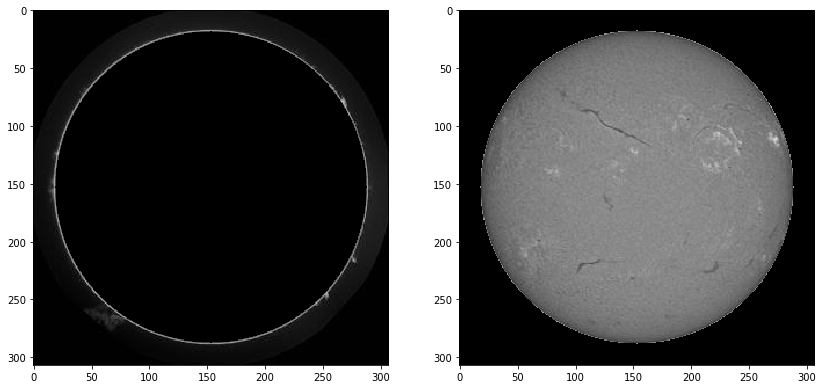

In [42]:
fig1 = plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(a)


plt.subplot(1, 2, 2)
plt.imshow(b)


plt.show()


In [43]:
def intensity(img):
    # img must not be a gray image
    temp=[img[j][i][0] for j in range(img.shape[0])  for i in range(img.shape[1])]
    intensity = np.reshape(temp, [img.shape[0],img.shape[1]])
    return intensity


def intensity_gray(img):
    # img must be a gray image
    temp=[img[j][i] for j in range(img.shape[0])  for i in range(img.shape[1])]
    intensity = np.reshape(temp, [img.shape[0],img.shape[1]])
    return intensity

# Why does the mean intensity not change danger danger danger

In [44]:
#intensity=[b[j][i][0] for j in range(b.shape[0])  for i in range(b.shape[1])]
#intensity = np.reshape(intensity, [307,307])

In [45]:
mean_inten = np.mean(intensity(b)[np.nonzero(intensity(b))])
print(mean_inten)
median_inten = np.median(intensity(b)[np.nonzero(intensity(b))])
print(median_inten)

124.94974566938768
129.0


# dANGER DANGER

In [46]:
mean_int=1.266*mean_inten

In [47]:
b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
b_gray1 = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

In [48]:
b_gray1[235,150]

132

In [49]:
b_gray[np.where(b_gray1 > mean_int)]=median_inten

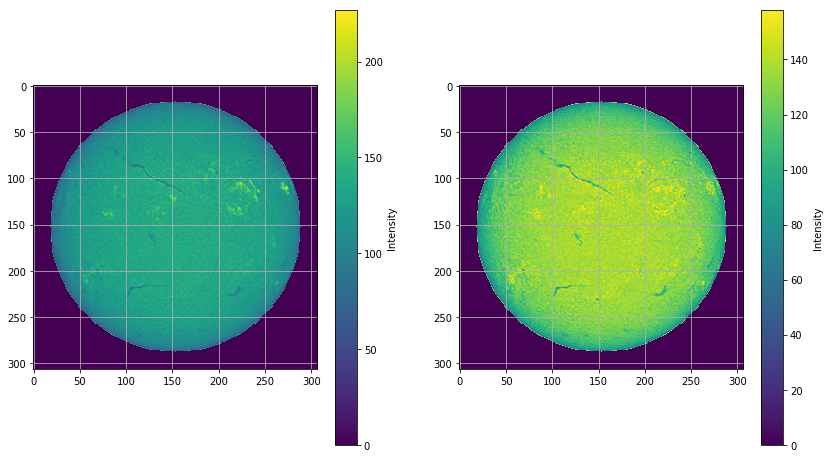

In [50]:
fig100= plt.figure(figsize=(14,8))


plt.subplot(1, 2, 1)
plt.imshow(b_gray1)
plt.colorbar().set_label('Intensity')

plt.grid()


plt.subplot(1, 2, 2)
plt.imshow(b_gray)
plt.colorbar().set_label('Intensity')
plt.grid()


plt.show()

unsharp mask

gaussian_3 = cv2.GaussianBlur(b_gray1, (9,9), 10.0)
unsharp_image = cv2.addWeighted(b_gray1, 1.5, gaussian_3, -0.5, 0, b_gray1)
#cv2.imwrite("lenna_unsharp.jpg", unsharp_image)
fig101= plt.figure(figsize=(14,8))

plt.imshow(unsharp_image)
plt.show()

threshold

#ret,thresh1 = cv2.threshold(b,mean_int,255,cv2.THRESH_BINARY)
#ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(b,mean_int,0,cv2.THRESH_TRUNC)
#ret,thresh4 = cv2.threshold(b,mean_int,mean_int,cv2.THRESH_TOZERO_INV)
#ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
fig10 = plt.figure(figsize=(14,8))

#titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images1 = [b, thresh3]
plt.subplot(1, 2, 1)
plt.imshow(images1[0])
#plt.colorbar().set_label('Intensity')

plt.grid()


plt.subplot(1, 2, 2)
plt.imshow(images1[1])
#plt.colorbar().set_label('Intensity')
plt.grid()


plt.show()

#th_gray= cv2.cvtColor(thresh3, cv2.COLOR_BGR2GRAY)
th_gray = b_gray

fig10 = plt.figure(figsize=(14,8))
adpth = cv2.adaptiveThreshold(th_gray,mean_int,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15,mean_int*0.1)

images2 = [thresh3, adpth]
plt.subplot(1, 2, 1)
plt.imshow(images2[0])


plt.subplot(1, 2, 2)
plt.imshow(images2[1])

plt.grid()

plt.show()

copy = adpth.copy()
copy[np.where(adpth==152)]=0
copy[np.where(adpth!=152)]=1


print(mean_int-135)

In [51]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

gaussian blur

#attempting to apply a gaussian smooth/blur before the edge detector:
fig = plt.figure(figsize=(14,8))
blur = cv2.GaussianBlur(thresh3,(3,3),0.4)
plt.imshow(blur)
plt.show()


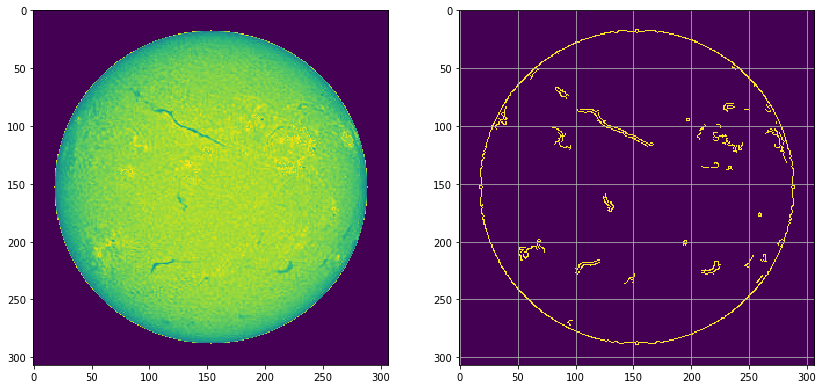

In [52]:
fig12 = plt.figure(figsize=(14,8))
edges = cv2.Canny(b_gray,mean_int-100,mean_int-10) #using edge detector to detect filaments, also detects edge of circle
images2 = [b_gray, edges]
plt.subplot(1, 2, 1)
plt.imshow(images2[0])


plt.subplot(1, 2, 2)
plt.imshow(images2[1])

plt.grid()

plt.show()

In [53]:
copy2 = edges.copy()
copy2[np.where(copy2==255)]=1

In [54]:
copy2.shape



(307, 307)

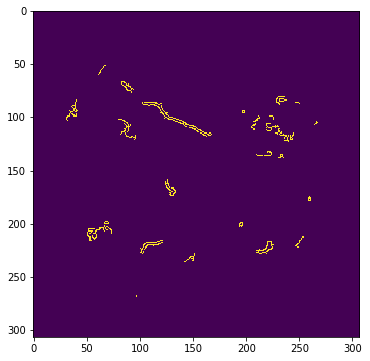

In [55]:
#trying to make a mask of slightly smaller radius, to get rid of the yellow edges 
#lore: seems that using r-7 as radius for all the pictures is a good value to not loose almost nothing

maskk = np.zeros(edges.shape, dtype=np.uint8)
cv2.circle(maskk, (148,151), r-7, (255, 255, 255), -1, 8, 0)
max_loc = (148,151)
circle_radius = 132
# Apply mask (using bitwise & operator)
result_array = cv2.bitwise_and(edges, maskk, mask = maskk)
#result_array = cv2.bitwise_xor(edges,~maskk)


# Crop/center result (assuming max_loc is of the form (x, y))
#result_array = result_array[max_loc[1] - circle_radius:max_loc[1] + 132,
fig14 = plt.figure(figsize=(8,6))
                           #max_loc[0] - circle_radius:max_loc[0] + 132, :]
plt.imshow (result_array)
plt.show()

In [56]:
#blur_gray= cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

In [57]:
## Erosion and Dilation


<function matplotlib.pyplot.show(*args, **kw)>

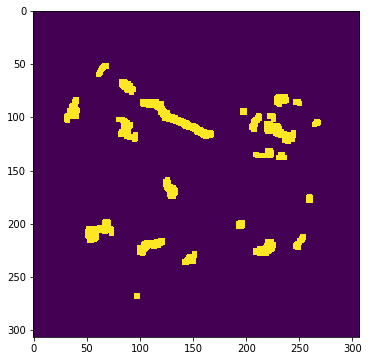

In [58]:
#check kernel for a general image
fig141 = plt.figure(figsize=(8,6))
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(result_array,kernel,iterations = 1)
plt.imshow(dilation)
plt.show


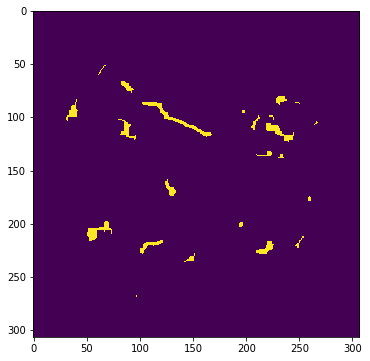

In [59]:
fig144= plt.figure(figsize=(8,6))

erosion = cv2.erode(dilation,kernel,iterations = 1)

#plt.imshow(b_gray, zorder=1)

plt.imshow(erosion, zorder=0)
plt.show()


## Tagging

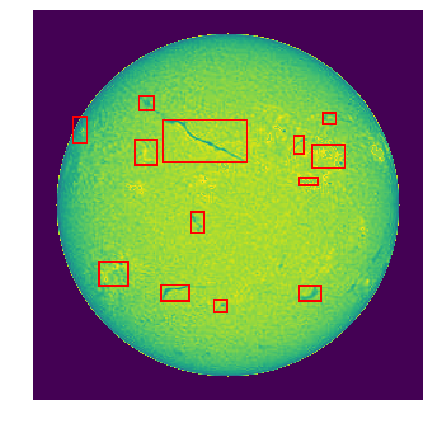

In [60]:
#applying region tags to the erosion image above

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = erosion.copy()
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

#we are now applying these tagged regions to b, our original image 

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(b_gray)
interesting = []
regions = []
for region in regionprops(label_image, intensity_image=b_gray):
    # take regions with large enough areas
    if region.area >= 25:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        roi = b_gray[minr:minr+maxr - minr,minc:minc+maxc - minc]
        interesting.append(roi)
        regions.append(region)

ax.set_axis_off()
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

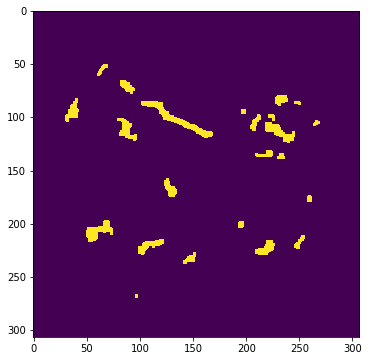

In [61]:
#shall we dilate again?
fig1417 = plt.figure(figsize=(8,6))
kernel = np.ones((3,3),np.uint8)
dilation2 = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation2)
plt.show


In [62]:
# remove the filaments from the background in the interesting boxes

empty_b_gray = b_gray.copy()
mask = np.zeros(np.shape(empty_b_gray))    


for k in regions:

    x_c = np.zeros(len(k.coords))
    y_c = np.zeros(len(k.coords))

    for i in np.arange(len(k.coords)):
        x_c[i] = k.coords[i][0]
        y_c[i] = k.coords[i][1]

    mask[x_c.astype(int),y_c.astype(int)]=True
        
import numpy.ma as ma
empty_b_gray = ma.masked_where(mask, empty_b_gray)




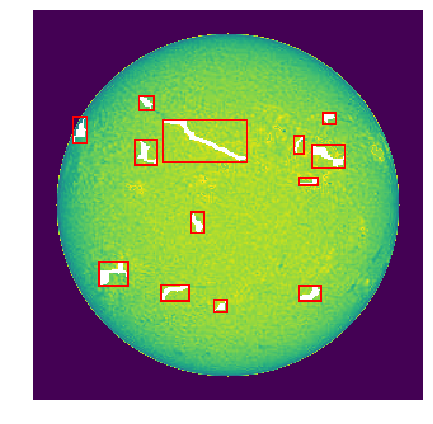

In [63]:
#box tagging of interestings with the regions masked
empty_interesting = []
empty_regions = []
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(empty_b_gray)
for region in regionprops(label_image, intensity_image=empty_b_gray):
    # take regions with large enough areas
    if region.area >= 20:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        empty_roi = empty_b_gray[minr:minr+maxr - minr,minc:minc+maxc - minc]
        empty_interesting.append(empty_roi)

ax.set_axis_off()
plt.tight_layout()
plt.show()

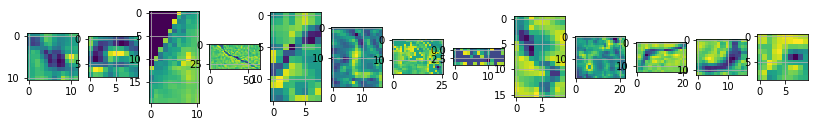

In [64]:
#plotting all candidates, not subtracting the background 
fig1562 = plt.figure(figsize=(14,8))

for i in np.arange(len(regions)):
    plt.subplot(1, len(regions), i+1)
    plt.imshow(interesting[i])

    plt.grid()

plt.show()

In [65]:
#defining intensities of regions in the final candidates
intensities = np.zeros(len(regions))
for i in np.arange(len(regions)):
    intensities[i]=regions[i].mean_intensity
print(intensities)

[111.27272727 121.63265306  97.33766234 120.16923077 137.13793103
 138.5        138.66883117 138.17241379 125.60869565 129.68
 113.6        116.04301075 129.125     ]


In [66]:
#intensities of the background in the interesting boxes having subtracted the masked parts
bg_mean = []

for i in empty_interesting:
    m = np.mean(i)
    bg_mean.append(m)


In [67]:
print(bg_mean)

[122.20779220779221, 127.58064516129032, 65.06993006993007, 137.63295099061523, 137.85542168674698, 132.3109243697479, 136.9044585987261, 136.84782608695653, 137.07692307692307, 127.46341463414635, 135.25510204081633, 133.81981981981983, 136.89655172413794]


In [68]:
#defining the final candidates using the background mean intensity as reference value and creating a list of possible filaments
possible_filaments=[]
for i in np.arange(len(interesting)):
    if bg_mean[i]>intensities[i]:
        possible_filaments.append((regions[i],interesting[i]))

In [69]:
help(regions[0])

Help on _RegionProperties in module skimage.measure._regionprops object:

class _RegionProperties(builtins.object)
 |  _RegionProperties(slice, label, label_image, intensity_image, cache_active, coordinates)
 |  
 |  Please refer to `skimage.measure.regionprops` for more information
 |  on the available region properties.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, slice, label, label_image, intensity_image, cache_active, coordinates)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  area
 |      Number of pixels of region.
 |  
 |  bbox
 |      Bounding box ``(min_row, m

0.4166666666666667
11
12
0.6125
8
10
0.11937557392102846
33
66
0.25892857142857145
14
8
0.43125
16
10
0.3146853146853147
13
22
0.45588235294117646
12
17
0.35555555555555557
9
10


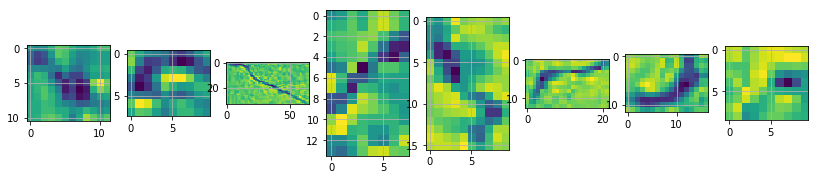

In [70]:
#plotting final candidates
fig1576 = plt.figure(figsize=(14,8))

for i in np.arange(len(possible_filaments)):
    #print the ratio of pixels of filament vs the box
    print(possible_filaments[i][0].extent)
    # print the dimensions of the box
    # problem: not so clear
    print(possible_filaments[i][0].bbox[2]-possible_filaments[i][0].bbox[0])
    print(possible_filaments[i][0].bbox[3]-possible_filaments[i][0].bbox[1])

    plt.subplot(1, len(possible_filaments), i+1)
    plt.imshow(possible_filaments[i][1])

    plt.grid()

plt.show()

# This doesn't work very well :( 

In [71]:
final_classification = []

#trying to select filaments basing on the ratio of the lengths of the sides of the boxes of the final candidates 
for i in np.arange(len(possible_filaments)):
    h_box = possible_filaments[i][0].bbox[2]-possible_filaments[i][0].bbox[0]
    v_box = possible_filaments[i][0].bbox[3]-possible_filaments[i][0].bbox[1]
    ratio = possible_filaments[i][0].extent
    if (h_box/v_box < 1.2) and (h_box/v_box > 0.8) and (ratio >0.33):
        final_classification.append([possible_filaments[i][0],possible_filaments[i][1],0])
    else:
        final_classification.append([possible_filaments[i][0],possible_filaments[i][1],1])

0
1
1
1
1
1
1
0


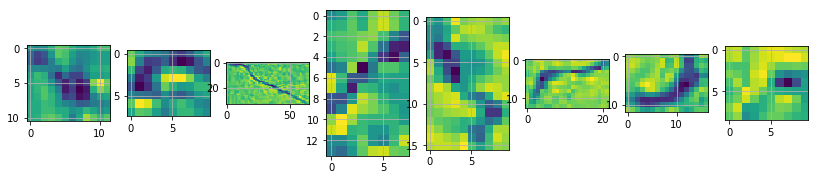

In [72]:
fig186 = plt.figure(figsize=(14,8))

for i in np.arange(len(final_classification)):
    # 1 if we classify as filament, 0 if not
    print(final_classification[i][2])
    # plot the regions again
    plt.subplot(1, len(final_classification), i+1)
    plt.imshow(final_classification[i][1])

    plt.grid()

plt.show()

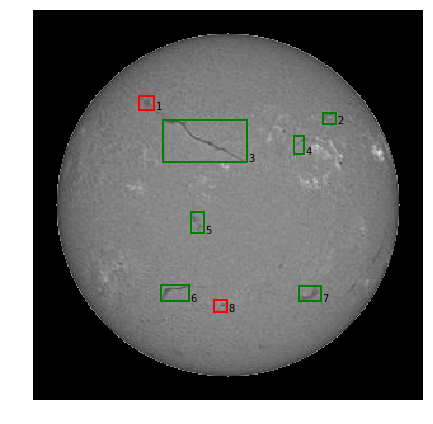

In [73]:
#finding the final candidates in the original image. A green box means a filament, red something else.
possible_regions = [i[0] for i in final_classification]
marker = [i[2] for i in final_classification]

fig67, ax = plt.subplots(figsize=(10, 6))
ax.imshow(b)
for i in np.arange(len(final_classification)):
    if marker[i] == 0:
        minr, minc, maxr, maxc = possible_regions[i].bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        plt.text(maxc+1, maxr,str(i+1))
    else:
        minr, minc, maxr, maxc = possible_regions[i].bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=2)
        ax.add_patch(rect)
        plt.text(maxc+1, maxr,str(i+1))

        
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [74]:
help(final_classification[0][0])

Help on _RegionProperties in module skimage.measure._regionprops object:

class _RegionProperties(builtins.object)
 |  _RegionProperties(slice, label, label_image, intensity_image, cache_active, coordinates)
 |  
 |  Please refer to `skimage.measure.regionprops` for more information
 |  on the available region properties.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, slice, label, label_image, intensity_image, cache_active, coordinates)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  area
 |      Number of pixels of region.
 |  
 |  bbox
 |      Bounding box ``(min_row, m

In [75]:
results = np.empty((len(final_classification)+1,5), dtype=object)
for i in np.arange(len(final_classification)):
    # Table header
    results[0,:]= ['Name', 'Center Coord.', 'Box', 'Intensity', 'Likely filament?']
    # Name of the filament: 1, 2, 3, 4...
    results[i+1,0]=str(i+1)
    
    # Coordinates of center
    results[i+1,1]= final_classification[i][0].centroid
    
    # Dimensions of box enclosing the region: 
    # Bounding box ``(min_row, min_col, max_row, max_col)``.
    # Pixels belonging to the bounding box are in the half-open interval
    # ``[min_row; max_row)`` and ``[min_col; max_col)``.
    results[i+1,2] = final_classification[i][0].bbox
    
    # Intensity of the region
    results[i+1,3] = final_classification[i][0].mean_intensity
    
    # Likely a filament or not
    if final_classification[i][2]:
        results[i+1,4] = 'Probably yes'
    else:
        results[i+1,4] = 'Probably no'

    


In [76]:
print(results)

[['Name' 'Center Coord.' 'Box' 'Intensity' 'Likely filament?']
 ['1' (71.56363636363636, 88.10909090909091) (67, 83, 78, 95)
  111.27272727272727 'Probably no']
 ['2' (83.59183673469387, 231.9591836734694) (81, 228, 89, 238)
  121.63265306122449 'Probably yes']
 ['3' (100.59615384615384, 132.54615384615386) (86, 102, 119, 168)
  120.16923076923077 'Probably yes']
 ['4' (105.34482758620689, 208.13793103448276) (99, 205, 113, 213)
  137.13793103448276 'Probably yes']
 ['5' (167.53623188405797, 128.4927536231884) (159, 124, 175, 134)
  125.6086956521739 'Probably yes']
 ['6' (220.6, 109.13333333333334) (216, 100, 229, 122) 113.6
  'Probably yes']
 ['7' (223.66666666666666, 217.79569892473117) (217, 209, 229, 226)
  116.04301075268818 'Probably yes']
 ['8' (233.03125, 147.6875) (228, 142, 237, 152) 129.125 'Probably no']]
